# EDA - Used Car Resale Price 


This notebook introduces the pandas library for data loading and prepartation and explores techniques of Exploratory Data Analysis (EDA).

## Dataset

**Filename**: used_cars_maruti.csv

It is a comma separated file and there are 11 columns in the dataset.

1. Model - Model of the car
2. Location - The location in which the car was sold.
3. Age - Age of the car when the car was sold from the year of purchase.
4. KM_Driven - The total kilometers are driven in the car by the previous owner(s) in '000 kms.
5. Fuel_Type - The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission - The type of transmission used by the car. (Automatic / Manual)
7. Owner_Type - First, Second, Third, or Fourth & Above
8. Mileage - The standard mileage offered by the car company in kmpl or km/kg
9. Power - The maximum power of the engine in bhp.
10. Seats - The number of seats in the car.
11. Price - The resale price of the car (target).

## Loading Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
cars_df = pd.read_csv('E:\ML_course\practice\S4_EDA_(part 1)/used_cars_maruti.csv')

- Showing Few Records

In [3]:
cars_df.head(5)          

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
0,Chennai,Diesel,Manual,First,7,6.00,8,ertiga,20.77,88.76,87
1,Jaipur,Diesel,Manual,First,5,5.60,5,swift,25.20,74.00,64
2,Jaipur,Diesel,Manual,First,5,5.99,3,swift,28.40,74.00,25
3,Hyderabad,Petrol,Manual,Second,5,2.75,7,alto,20.92,67.10,54
4,Jaipur,Petrol,Manual,Second,5,1.85,11,wagon,14.00,64.00,83


- Getting Metadata

In [4]:
cars_df.shape

(1070, 11)

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      1070 non-null   object 
 1   Fuel_Type     1070 non-null   object 
 2   Transmission  1070 non-null   object 
 3   Owner_Type    1070 non-null   object 
 4   Seats         1070 non-null   int64  
 5   Price         1070 non-null   float64
 6   Age           1070 non-null   int64  
 7   Model         1070 non-null   object 
 8   Mileage       1070 non-null   float64
 9   Power         1070 non-null   float64
 10  KM_Driven     1070 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 92.1+ KB


- Sampling Records

In [6]:
cars_df.sample(5)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
17,Mumbai,Diesel,Manual,First,5,7.50,4,vitara,24.30,88.50,55
210,Ahmedabad,Petrol,Manual,First,5,2.71,12,swift,16.10,88.20,65
286,Kolkata,Petrol,Manual,First,5,2.35,5,alto,22.74,47.30,11
152,Coimbatore,Diesel,Manual,First,7,7.50,4,ertiga,20.77,88.76,85
483,Pune,Petrol,Manual,First,5,2.30,8,wagon,18.90,67.10,82


### Univariate Analysis - Analyzing One Variable

#### Transmission Types
- What are different transmission types and how many cars are available from each transmission type (in percentages)?

In [7]:
cars_df.Transmission.value_counts()

Transmission
Manual       976
Automatic     94
Name: count, dtype: int64

In [8]:
cars_df.Transmission.value_counts(normalize=True)*100         # multiply 100 for percentages

Transmission
Manual       91.214953
Automatic     8.785047
Name: proportion, dtype: float64

### Ex1. Participants Exercises:

- What are different owner types?
- What percentage of cars are available from each owner type for resale?

In [9]:
cars_df.Owner_Type.value_counts()

Owner_Type
First             921
Second            129
Third              19
Fourth & Above      1
Name: count, dtype: int64

In [10]:
cars_df.Owner_Type.value_counts(normalize=True)*100

Owner_Type
First             86.074766
Second            12.056075
Third              1.775701
Fourth & Above     0.093458
Name: proportion, dtype: float64

#### Filtering Records
- Find out how many cars were sold that were 15 years old or more?

In [11]:
old_cars_df = cars_df[cars_df.Age > 14]

In [12]:
old_cars_df.shape

(34, 11)

In [13]:
cars_df = cars_df[cars_df.Age < 15]
cars_df.shape

(1036, 11)

#### Most and Least Expensive Cars

In [14]:
cars_df.sort_values('Price', ascending=False)[0:5]

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Age,Model,Mileage,Power,KM_Driven
873,Kochi,Diesel,Manual,First,5,10.19,2,vitara,24.30,88.5,57
629,Coimbatore,Diesel,Manual,First,5,10.15,2,vitara,24.30,88.5,52
343,Kochi,Petrol,Manual,First,5,9.96,2,ciaz,20.73,91.1,15
1051,Hyderabad,Petrol,Automatic,First,5,9.95,3,ciaz,19.12,91.1,15
24,Kochi,Petrol,Manual,First,5,9.90,2,ciaz,20.73,91.1,41


### Ex2. Participants Exercises:

- Find out top 10 least expensive cars sold in Bangalore and print only their names and sold price 

    - Apply filter
    - Sort values 
    - Slice by column names
    - Print only top 10 rows

In [15]:
bangalore_cars = cars_df[cars_df.Location == 'Bangalore']

In [16]:
bangalore_cars.sort_values('Price' , ascending = True)[['Model','Price']][:10]


,Model,Price
161,zen,1.65
837,alto,2.39
131,wagon,2.45
104,alto,2.75
475,alto,2.75
884,swift,2.85
63,alto,2.90
882,swift,3.00
861,swift,3.10
655,ritz,3.65


#### Distribution of Resale Price
- A distribution in statistics is a function that shows the possible values for a variable and how often they occur.
- How many cars are sold at different price ranges? For example: cars sold in the price range of 1L - 2L, 2L - 3L etc.?

#### Histogram for plotting Continuous Variables (Price)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_style("whitegrid")
sn.set_context("paper")
sn.color_palette("Set2");

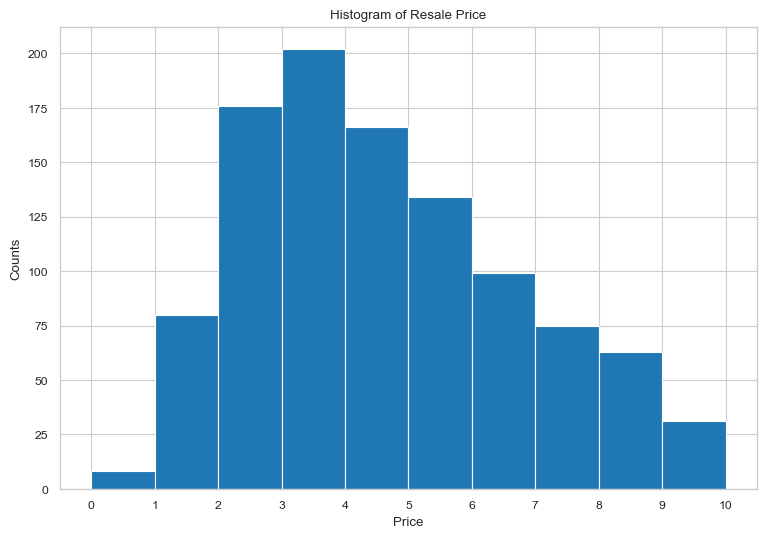

In [18]:
plt.figure(figsize=(9, 6))
plt.hist(cars_df.Price, bins = list(range(0, 11, 1)));
plt.xticks(list(range(0, 11, 1)))
plt.xlabel("Price")
plt.ylabel("Counts")
plt.title("Histogram of Resale Price");

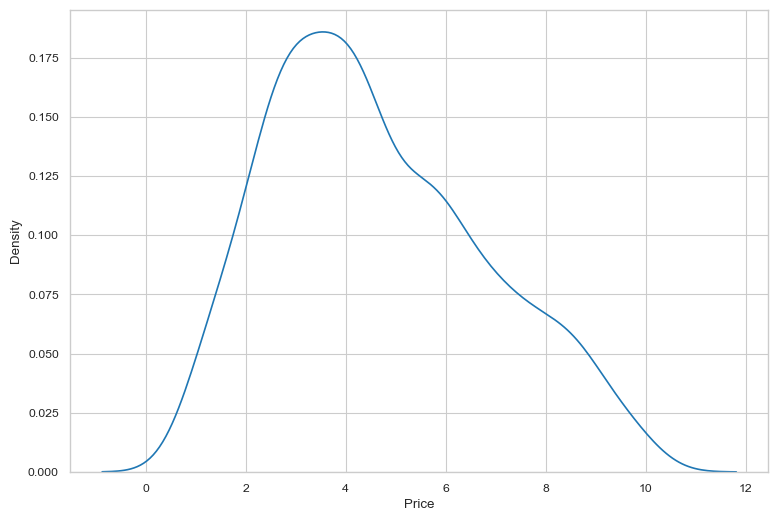

In [19]:
plt.figure(figsize=(9, 6))
sn.kdeplot(data = cars_df, 
           x = 'Price');

### Ex3. Participants Exercises:

- Draw a histogram for kilometer driven with each bin of size 10000km

In [20]:
cars_df.KM_Driven.min(),cars_df.KM_Driven.max()

(0, 168)

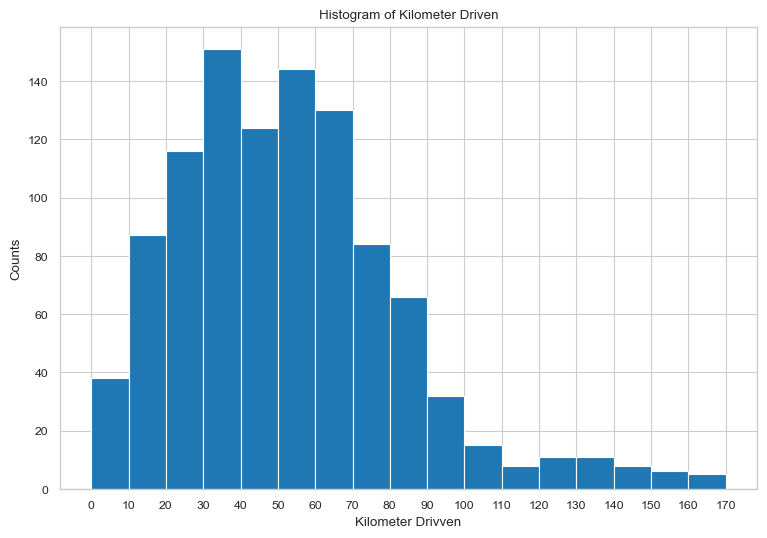

In [21]:
plt.figure(figsize=(9,6))
plt.hist(cars_df.KM_Driven, bins= list(range(0,180,10)))
plt.xticks(list(range(0,180,10)))
plt.xlabel("Kilometer Drivven")
plt.ylabel("Counts")
plt.title("Histogram of Kilometer Driven");

#### Outliers
- In statistics, an outlier is a data point that differs significantly from other observations.
- An outlier can cause serious problems in statistical analyses.

### Ex4. Participants Exercise:

- Find any outliers in terms of kilometer driven using both standard deviation and box plot approach?

In [22]:
from scipy import stats

- Using Standard Deviation Approach

In [23]:
km_997 = stats.norm.interval(0.997,
                    cars_df.KM_Driven.mean(),
                    cars_df.KM_Driven.std())

In [24]:
km_997

(-36.486276277500814, 140.69863148985567)

In [25]:
outliers_std = cars_df[cars_df.KM_Driven > km_997[1]]

In [26]:
outliers_std.shape
# 17 outliers using Standard deviation approach

(17, 11)

#### Using Boxplot Approach

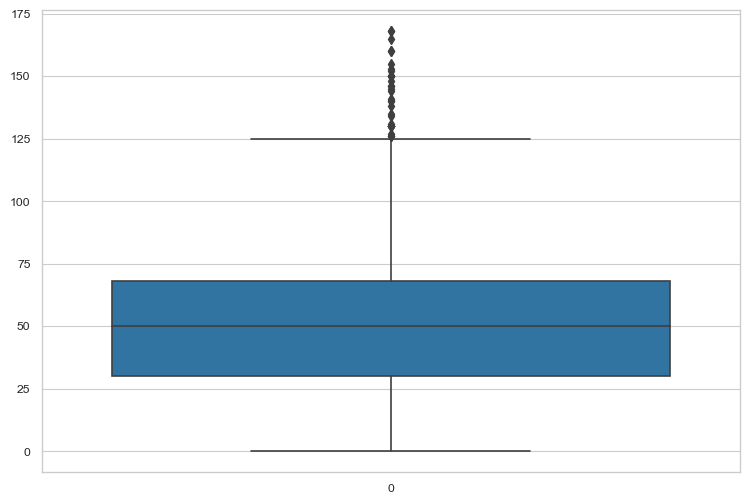

In [27]:
plt.figure(figsize=(9,6))
sn.boxplot(cars_df.KM_Driven);

In [28]:
cars_df.KM_Driven.median()

50.0

In [29]:
iqr = stats.iqr(cars_df.KM_Driven)
iqr

38.0

In [30]:
km_stats = cars_df.KM_Driven.describe()
km_stats

count    1036.000000
mean       52.106178
std        29.851845
min         0.000000
25%        30.000000
50%        50.000000
75%        68.000000
max       168.000000
Name: KM_Driven, dtype: float64

In [31]:
min_km = km_stats['25%'] - 1.5 * iqr
max_km = km_stats['75%'] + 1.5 * iqr
min_km,cars_df.KM_Driven.median(), max_km

(-27.0, 50.0, 125.0)

In [32]:
outliers_boxplot = cars_df[cars_df.KM_Driven > max_km]

In [33]:
outliers_boxplot.shape
# 33 outliers using boxplot approach

(33, 11)

### Ex5. Participants Exercise

- Plot the number of cars sold for each of years of car edition (Year) using count plot.

**There is no model year is given in the dataset so we are using Age**

In [34]:
cars_df.Age.min(), cars_df.Age.max()

(1, 14)

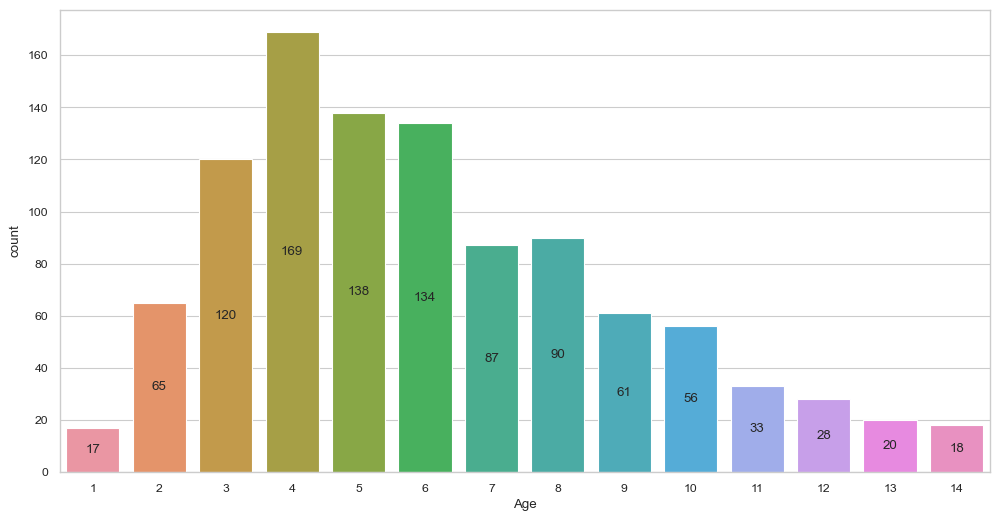

In [35]:
plt.figure(figsize=(12,6))
ax = sn.countplot(data= cars_df,
             x = 'Age')
ax.bar_label(ax.containers[0], label_type='center');

### Ex6. Participant Exercise:

- Find out the variations of sales prices for only SWIFT model for different ages (e.g. one year old, two year old and so on?

In [36]:
swift_price = cars_df[cars_df.Model == 'swift']

In [37]:
swift_price[['Age','Price']].reset_index(drop =True)

,Age,Price
0,5,5.60
1,3,5.99
2,6,4.25
3,6,3.30
4,7,3.85
...,...,...
321,5,4.80
322,11,3.00
323,8,4.80
324,9,2.75


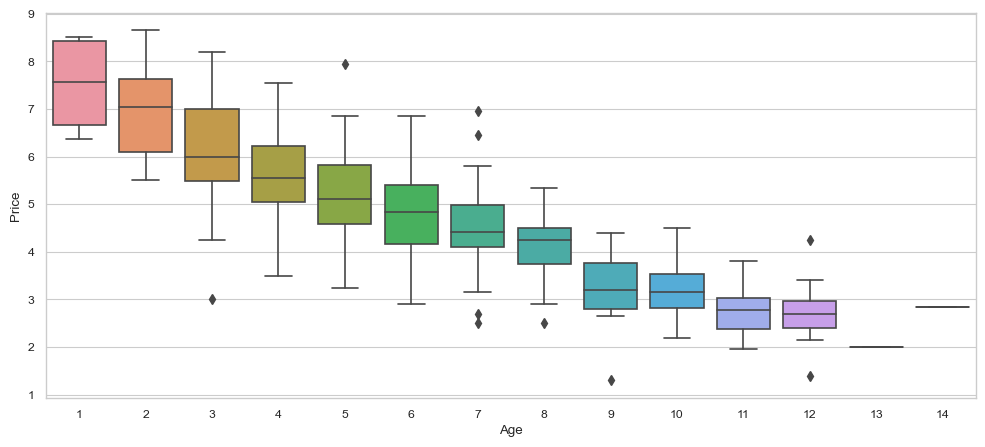

In [38]:
plt.figure(figsize=(12,5))
sn.boxplot(data=swift_price,
           x ='Age',
           y = 'Price');

#### Demand for models across different locations

In [39]:
models_by_locations = pd.crosstab(cars_df.Location, 
                                  cars_df.Model,
                                  normalize='index');
models_by_locations

Model,800,a-star,alto,baleno,celerio,ciaz,dzire,eeco,ertiga,esteem,ignis,omni,ritz,s-cross,swift,sx4,vitara,wagon,zen
Location,,,,,,,,,,,,,,,,,,,
Ahmedabad,0.000000,0.000000,0.090909,0.022727,0.045455,0.113636,0.022727,0.000000,0.113636,0.0000,0.000000,0.000000,0.000000,0.000000,0.363636,0.022727,0.045455,0.136364,0.022727
Bangalore,0.000000,0.000000,0.148148,0.000000,0.148148,0.037037,0.000000,0.000000,0.148148,0.0000,0.000000,0.000000,0.037037,0.000000,0.333333,0.000000,0.037037,0.074074,0.037037
Chennai,0.012500,0.000000,0.212500,0.050000,0.062500,0.050000,0.025000,0.012500,0.087500,0.0125,0.000000,0.000000,0.025000,0.000000,0.362500,0.012500,0.012500,0.062500,0.000000
Coimbatore,0.000000,0.011905,0.107143,0.095238,0.023810,0.083333,0.023810,0.071429,0.023810,0.0000,0.023810,0.047619,0.107143,0.011905,0.273810,0.000000,0.047619,0.047619,0.000000
Delhi,0.000000,0.010000,0.060000,0.110000,0.040000,0.080000,0.010000,0.010000,0.080000,0.0000,0.000000,0.000000,0.020000,0.010000,0.350000,0.020000,0.040000,0.140000,0.020000
Hyderabad,0.006250,0.043750,0.175000,0.031250,0.075000,0.031250,0.031250,0.006250,0.056250,0.0000,0.000000,0.037500,0.131250,0.000000,0.281250,0.006250,0.018750,0.043750,0.025000
Jaipur,0.049505,0.009901,0.128713,0.029703,0.019802,0.069307,0.019802,0.000000,0.039604,0.0000,0.000000,0.039604,0.049505,0.000000,0.366337,0.009901,0.009901,0.148515,0.009901
Kochi,0.000000,0.010000,0.130000,0.110000,0.050000,0.140000,0.020000,0.000000,0.040000,0.0000,0.010000,0.010000,0.030000,0.000000,0.240000,0.010000,0.090000,0.100000,0.010000
Kolkata,0.000000,0.009174,0.146789,0.027523,0.055046,0.027523,0.018349,0.000000,0.045872,0.0000,0.000000,0.009174,0.064220,0.009174,0.376147,0.000000,0.018349,0.183486,0.009174


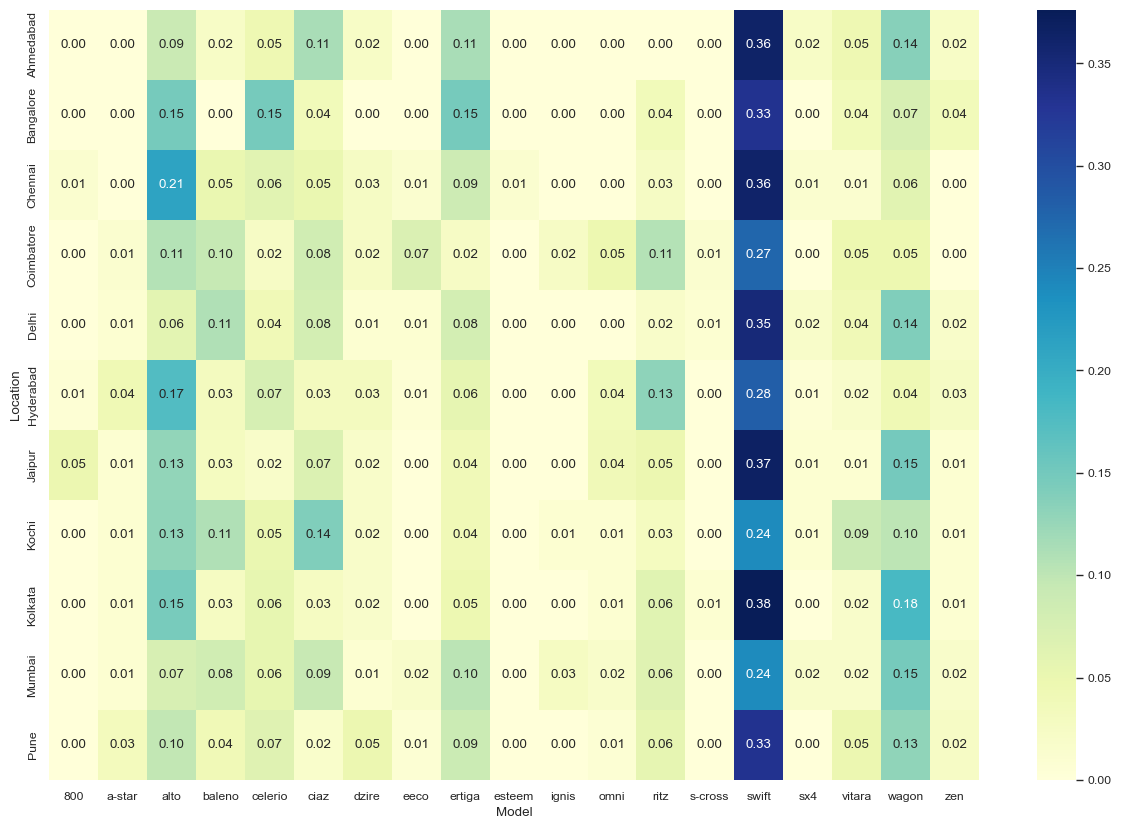

In [40]:
plt.figure(figsize=(15, 10));
sn.heatmap(models_by_locations, annot = True, fmt = '0.2f', cmap = 'YlGnBu');

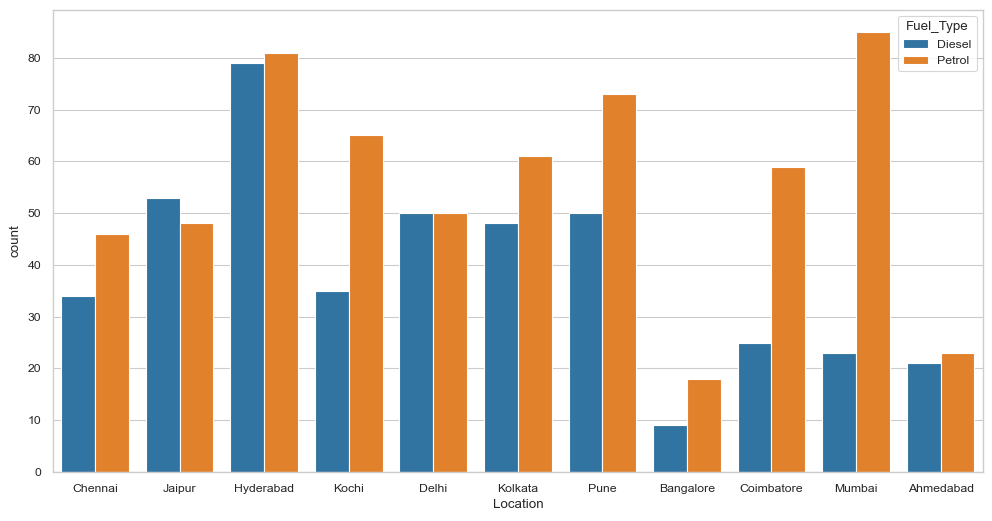

In [41]:
plt.figure(figsize=(12, 6));
sn.countplot(data = cars_df,
             x = 'Location',
             hue = 'Fuel_Type' );

### Ex7. Participants Exercise:

- Find out the demand for differnent fuel type of cars for different models?


In [42]:
cars_df.Fuel_Type.value_counts()

Fuel_Type
Petrol    609
Diesel    427
Name: count, dtype: int64

In [43]:
cars_fueltype = pd.crosstab(cars_df.Fuel_Type,
                            cars_df.Model,
                            normalize= 'index');

In [44]:
cars_fueltype = pd.crosstab(cars_df.Model,
                            cars_df.Fuel_Type,
                            normalize= 'index');

In [45]:
# cars_fueltype

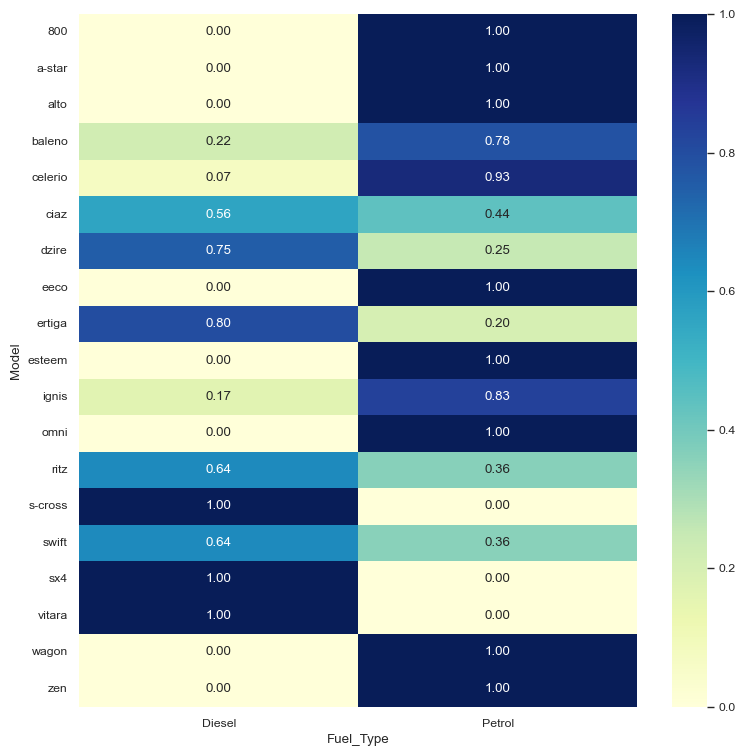

In [46]:
plt.figure(figsize=(9, 9))
sn.heatmap(cars_fueltype,
           annot = True,
           fmt = "0.2f",
           cmap = 'YlGnBu');

# Rules for plotting

- Single Variable (Univariate Analysis)
    - Continuous -> Histogram, boxplot, distribution plot
    - Categorical -> Count Plot/Bar Plot

- Two Variables (Bivariate Analysis)
    - Continuous + Categorical -> Box plot, Overlapped Distribution Plot
    - Continuous + Continuous -> Scatter Plot, heatmap
    - Categoical + Categorical -> Bar Plot / Count Plot, heatmap

#### How mileage is effecting the resale price?

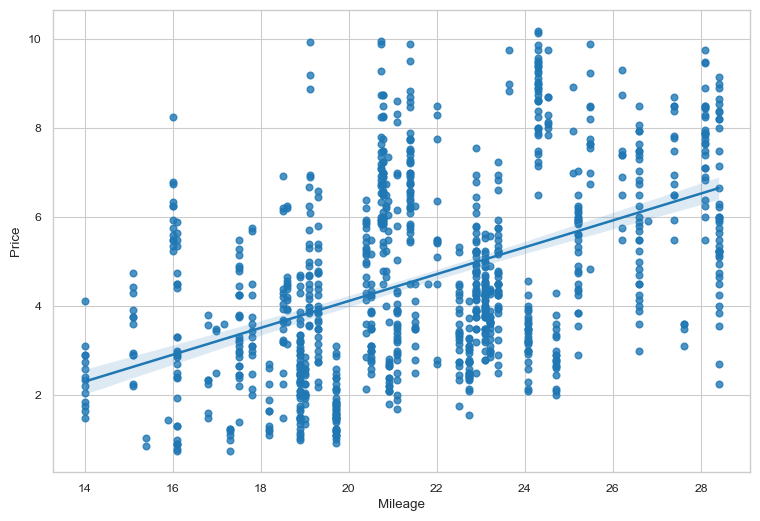

In [47]:
plt.figure(figsize=(9, 6));
sn.regplot(data = cars_df,
           x = 'Mileage',
           y = 'Price');

#### How kilometer driven is effecting the resale price?

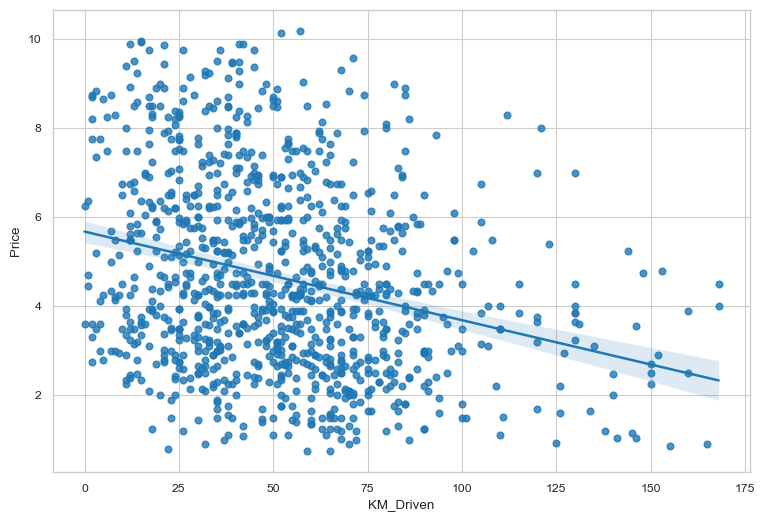

In [48]:
plt.figure(figsize=(9, 6));
sn.regplot(data = cars_df,
           x = 'KM_Driven',
           y = 'Price');

### Ex8. Participants Exercise:

- Find out the correlation between by drawing scatter plots
    - Power and Price
    - Age and Price

<Axes: xlabel='Power', ylabel='Price'>

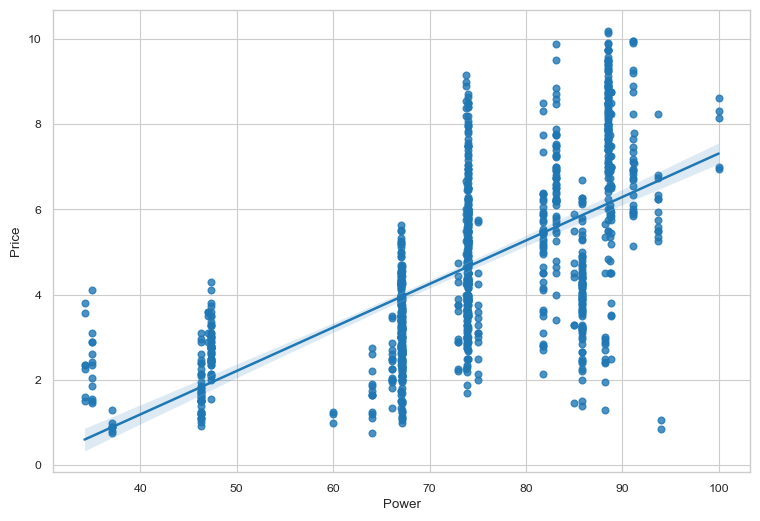

In [49]:
plt.figure(figsize=(9,6))
sn.regplot(data = cars_df,
           x = 'Power',
           y = 'Price')


<Axes: xlabel='Age', ylabel='Price'>

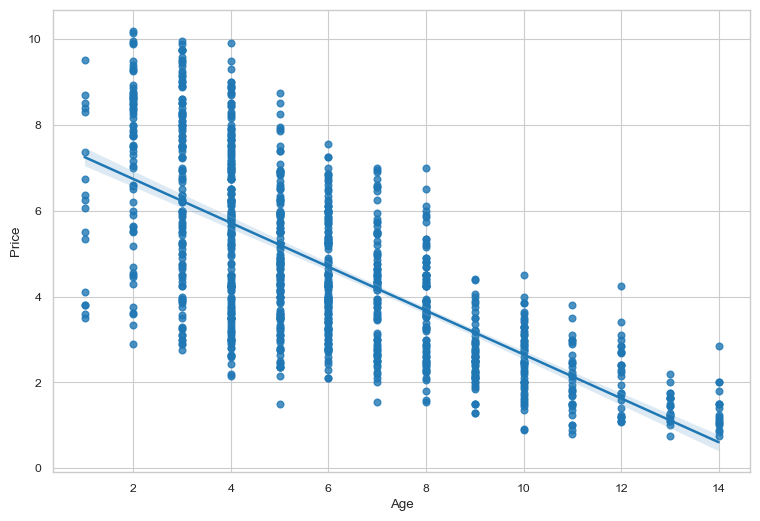

In [50]:
plt.figure(figsize=(9,6))
sn.regplot(data = cars_df,
           x = 'Age',
           y = 'Price')

### Ex9. Participants Exercise:
Finding corrleation between multiple variables (numerical)

In [51]:
corr_mat = cars_df[['Price', 'Age', 'Power', 'Mileage', 'KM_Driven']].corr()
corr_mat

,Price,Age,Power,Mileage,KM_Driven
Price,1.000000,-0.704371,0.635992,0.465009,-0.274786
Age,-0.704371,1.000000,-0.255755,-0.483087,0.494676
Power,0.635992,-0.255755,1.000000,0.095042,0.011712
Mileage,0.465009,-0.483087,0.095042,1.000000,-0.105075
KM_Driven,-0.274786,0.494676,0.011712,-0.105075,1.000000


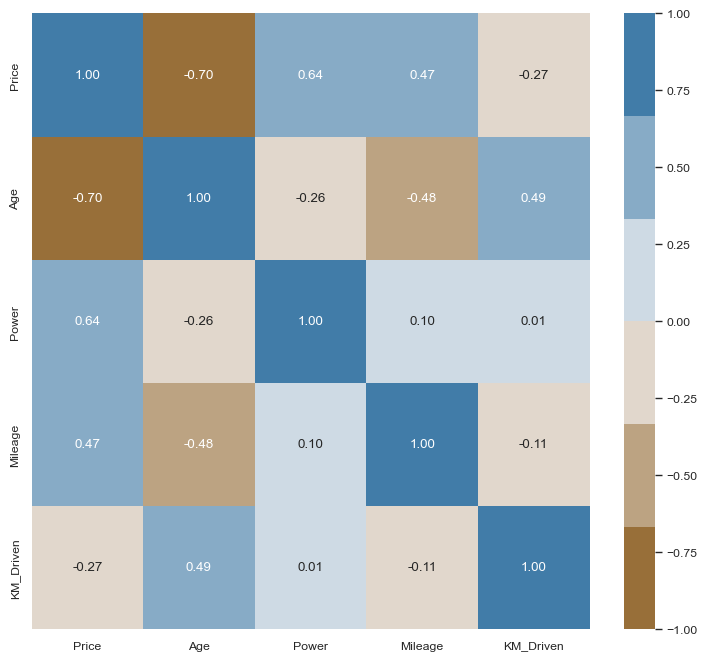

In [52]:
plt.figure(figsize=(9, 8));
sn.heatmap(corr_mat,
           annot = True,
           fmt = '0.2f',
           vmin = -1.0,
           vmax = 1.0,
           cmap = sn.diverging_palette(50, 240));

### Ex10. Participants Exercise:

- Create a new dataset of top 10 models from the cars_df dataset
- Remove the least data models
- Save the dataframe in csv format
- Save the dataframe in excel format.

#### Top !0 Models

In [53]:
models_df = cars_df.Model.value_counts().reset_index();
models_df.columns = ['Model', 'Counts']

In [54]:
models_df[:10]

,Model,Counts
0,swift,326
1,alto,130
2,wagon,115
3,ertiga,70
4,ciaz,66
5,ritz,64
6,baleno,60
7,celerio,56
8,vitara,35
9,dzire,24


In [55]:
top10_models = list(models_df.Model)[0:10]
top10_models

['swift',
 'alto',
 'wagon',
 'ertiga',
 'ciaz',
 'ritz',
 'baleno',
 'celerio',
 'vitara',
 'dzire']

#### Models to Remove

In [56]:
models_to_remove = list(models_df[models_df.Counts < 10]['Model'])
models_to_remove

['sx4', '800', 'ignis', 's-cross', 'esteem']

In [57]:
final_cars_df = cars_df[~cars_df.Model.isin(models_to_remove)]
final_cars_df.shape

(1010, 11)

#### Save the Dataframe in **csv** format

In [58]:
final_cars_df.to_csv('final_cars_maruti.csv', index = False)

#### Save the Dataframe in **excel** format

In [61]:
#pip install openpyxl

In [60]:
file_name = 'final_cars_df.xlsx'
final_cars_df.to_excel(file_name)